In [27]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings
%matplotlib inline

In [28]:
Path = '../../data/firstRound_4h.csv'
df = pd.read_csv(Path)
df.head()

,Unnamed: 0,RBS,Name,Rep1,Rep2,Rep3,AVERAGE,STD,PERC,Group,RBS6,Change_Pos,Base
0,0,TTTAAGAAGGAGATATACAT,RBS_1by1_0,3.194925,2.783529,1.798618,2.592357,0.717515,0.246643,bps,AGGAGA,1.0,T
1,1,CTTAAGAAGGAGATATACAT,RBS_1by1_1,1.844257,1.678119,1.290106,1.604161,0.284382,0.185590,bps,AGGAGA,1.0,C
2,2,GTTAAGAAGGAGATATACAT,RBS_1by1_2,0.674610,0.670263,0.643113,0.662662,0.017069,0.147150,bps,AGGAGA,1.0,G
3,3,ATTAAGAAGGAGATATACAT,RBS_1by1_3,1.986839,1.948917,1.101241,1.678999,0.500712,0.169798,bps,AGGAGA,1.0,A
4,4,TCTAAGAAGGAGATATACAT,RBS_1by1_4,1.830061,2.201733,0.983436,1.671743,0.624388,0.117162,bps,AGGAGA,2.0,C


In [29]:
Path2 = '../../data/First_round_results/CSVs/FirstRep1.csv'
df2 = pd.read_csv(Path2)
df2.set_index('Time',inplace=True)
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A9,A10,A11,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Time,,,,,,,,,,,,,,,,,,,,,
0:09:35,73,76,69,80,69,76,76,72,69,65,...,74,76,62,63,63,61,65,71,68,72
0:19:35,70,76,65,75,66,78,72,76,67,60,...,70,70,65,66,60,68,67,68,73,69
0:29:35,74,82,70,74,57,72,68,70,58,70,...,70,57,60,66,65,64,69,73,74,65
0:39:35,68,75,68,75,68,72,73,70,69,70,...,70,65,58,59,65,67,70,69,77,70
0:49:35,75,79,72,77,70,66,70,72,66,69,...,66,68,69,65,64,64,71,69,73,71


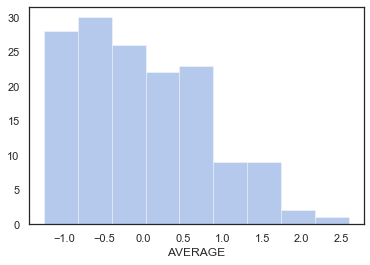

In [30]:
sns.set(style="white", palette="muted", color_codes=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df['AVERAGE'], kde=False, color="b")


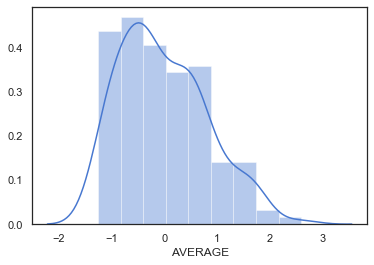

In [31]:
sns.distplot(df['AVERAGE'], kde=True, color="b")


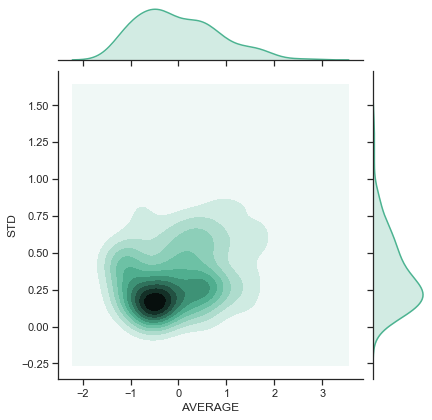

In [32]:
sns.set(style="ticks")

sns.jointplot(df['AVERAGE'], df['STD'],  kind="kde", color="#4CB391");

C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


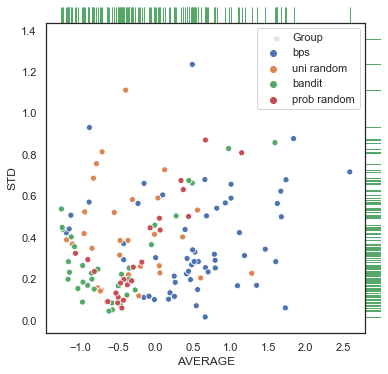

In [33]:
sns.set(style="white", color_codes=True)

grid = sns.JointGrid(df['AVERAGE'], df['STD'],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df['Group'])
grid.plot_marginals(sns.rugplot, height=1, color="g")

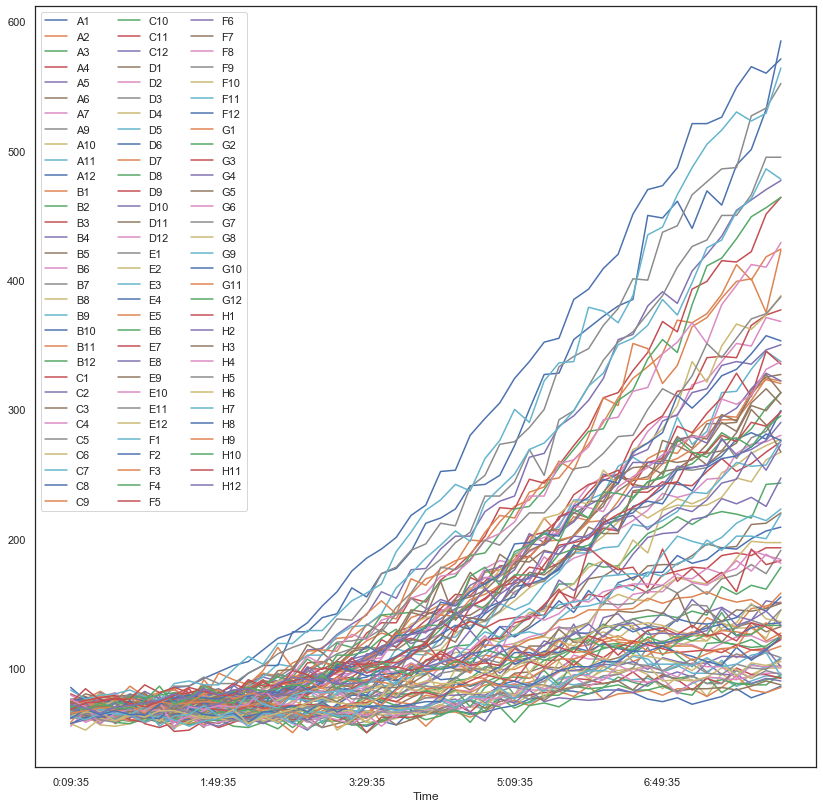

In [34]:
fig, ax = plt.subplots( figsize=(14,14))
df2.plot(ax = ax);
ax.legend(loc='upper left',ncol=3)

In [88]:
df3 = df.copy(deep=True)
df3.drop(['Unnamed: 0','Name','Rep1','Rep2','Rep3','PERC','RBS6'], axis=1,inplace=True)
df3.iloc[0:60].loc[df3['Base'] == "T"]

,RBS,AVERAGE,STD,Group,Change_Pos,Base
0,TTTAAGAAGGAGATATACAT,2.592357,0.717515,bps,1.0,T
11,TTTTAGAAGGAGATATACAT,1.625462,0.564901,bps,4.0,T
14,TTTATGAAGGAGATATACAT,0.527816,0.282055,bps,5.0,T
17,TTTAATAAGGAGATATACAT,0.570342,0.284792,bps,6.0,T
20,TTTAAGTAGGAGATATACAT,0.248283,0.214209,bps,7.0,T
23,TTTAAGATGGAGATATACAT,0.658424,0.680425,bps,8.0,T
26,TTTAAGAATGAGATATACAT,-0.426195,0.371703,bps,9.0,T
29,TTTAAGAAGTAGATATACAT,-1.130120,0.508253,bps,10.0,T
32,TTTAAGAAGGTGATATACAT,-0.157164,0.111716,bps,11.0,T
35,TTTAAGAAGGATATATACAT,0.816610,0.542200,bps,12.0,T


C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


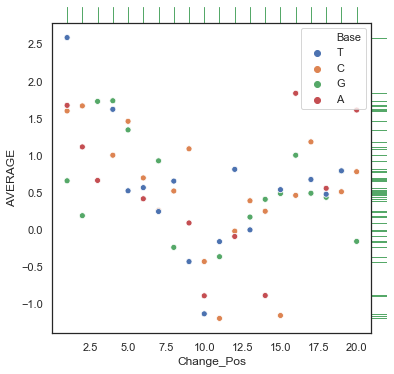

In [55]:
sns.set(style="white", color_codes=True)

grid = sns.JointGrid(df3['Change_Pos'].iloc[0:60], df3['AVERAGE'].iloc[0:60],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df3['Base'].iloc[0:60])
grid.plot_marginals(sns.rugplot, height=1, color="g")

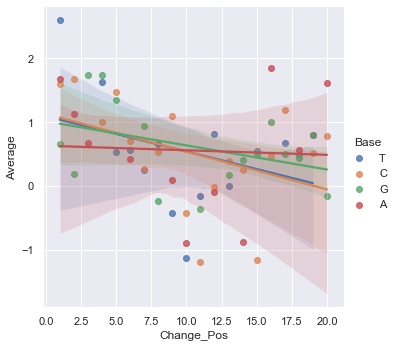

In [70]:
sns.set()
g = sns.lmplot(x ="Change_Pos", y= "AVERAGE",hue = "Base", height=5,data=df3,fit_reg=True)
g.set_axis_labels("Change_Pos", "Average")

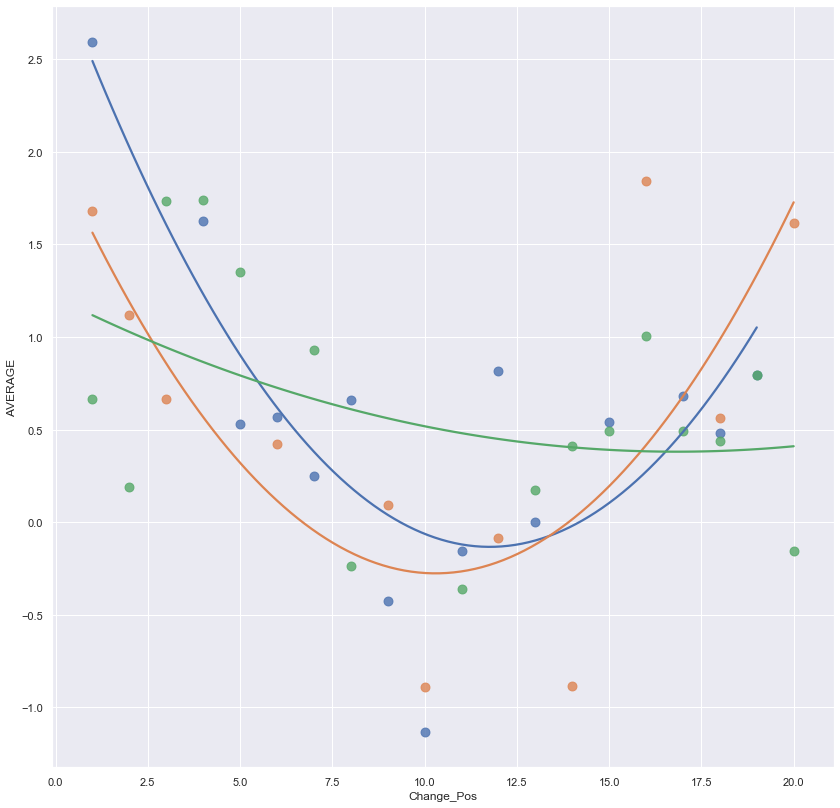

In [99]:
fig, ax = plt.subplots( figsize=(14,14))
ax = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[0:60].loc[df3['Base'] == "T"], scatter_kws={"s": 80}, order=2, ci=None)
ax = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[0:60].loc[df3['Base'] == "A"], scatter_kws={"s": 80}, order=2, ci=None)
ax = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[0:60].loc[df3['Base'] == "G"], scatter_kws={"s": 80}, order=2, ci=None)
#ax = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.iloc[0:60].loc[df3['Base'] == "C"], scatter_kws={"s": 80}, order=2, ci=None)
handles, labels = ax.get_legend_handles_labels()